# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4>
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div>
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [95]:
# Details Student 1: Ayala Noa Tzabari

# Details Student 2: Dikla Felach


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [96]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [97]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [98]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [99]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [100]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
!pip install hebrew_tokenizer

In [101]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [102]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [103]:
df_train.head(8)
df_train.shape

story gender
0  כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...      m
1  לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...      m
2  מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...      f
3  כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...      m
4  ‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...      f
5  לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...      f
6  אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...      m
7  השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...      f

(753, 2)

In [104]:
df_test.head(3)
df_test.shape

test_example_id                                              story
0                0  כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1                1  הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת "...
2                2  אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...

(323, 2)

### Your implementation:
Write your code solution in the following code-cells

#Cleaning missing and duplicates values in the Train & Test dataframe


In [105]:
#Missing values
print("Checking for missing values. The amount of missing values in the dataset are:")
print(f"Train:\n{df_train.isnull().sum()}")
print()
print(f"Test:\n{df_test.isnull().sum()}")
print("There is no missing value in our dataframe")

Checking for missing values. The amount of missing values in the dataset are:
Train:
story     0
gender    0
dtype: int64

Test:
test_example_id    0
story              0
dtype: int64
There is no missing value in our dataframe


In [106]:
#Duplicates values
print("Checking for duplicates values in the train dataframe. The amount of duplicates values in the dataset are:")

duplicate_values = df_train[df_train.duplicated(subset=['story','gender'], keep=False)]['story']
duplicate_count = df_train.duplicated(subset=['story','gender'], keep=False).sum()
print("The duplicates stories are:\n",duplicate_values)
print()
print(f"There are {duplicate_count} duplicates vals")
print()
df_train.drop_duplicates(subset=['story', 'gender'], inplace=True)
duplicate_count = df_train.duplicated(subset=['story','gender'], keep=False).sum()
print(f"Now after drop duplicates there are: {duplicate_count} duplicates vals")



Checking for duplicates values in the train dataframe. The amount of duplicates values in the dataset are:
The duplicates stories are:
 54     שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...
263    כזוג מאורס טרי סגרנו תאריך, אולם אירועים, ספקי...
310    בשנה האחרונה נדבקתי וחליתי בנגיף הקורונה. עד ה...
313    כזוג מאורס טרי סגרנו תאריך, אולם אירועים, ספקי...
450    בשנה האחרונה נדבקתי וחליתי בנגיף הקורונה. עד ה...
749    שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...
Name: story, dtype: object

There are 6 duplicates vals

Now after drop duplicates there are: 0 duplicates vals


In [107]:

print("Checking for duplicates values for test dataframe. The amount of duplicates values in the dataset are:")
duplicate_values = df_test[df_test.duplicated(subset=['story'], keep=False)]['story']
duplicate_count = df_test.duplicated(subset=['story'], keep=False).sum()
print("The duplicates stories are:\n",duplicate_values)
print()
print(f"There are {duplicate_count} duplicates vals")
print()
df_test.drop_duplicates(subset=['story'], inplace=True)
duplicate_count = df_test.duplicated(subset=['story'], keep=False).sum()
print(f"Now after drop duplicates there are: {duplicate_count} duplicates vals")

Checking for duplicates values for test dataframe. The amount of duplicates values in the dataset are:
The duplicates stories are:
 Series([], Name: story, dtype: object)

There are 0 duplicates vals

Now after drop duplicates there are: 0 duplicates vals


# Pre-Processing

In [108]:
# Replace category column to be with numeric values. 1 for male and 0 for female.

df_train['gender'] = df_train['gender'].apply(lambda x: 1 if x == 'm' else 0)

In [109]:
def Hebrew_tokenizer(df):
  tokens_list = []
  for story in df['story']:
      tokens = ht.tokenize(story) #For each story we will take out the tokens
      tokens_list.append(" ".join([token for _, token, _, _ in tokens])) #Each string is formed by joining the tokens together with a space separator
  return tokens_list

In [110]:
tokens_list=Hebrew_tokenizer(df_train)

# We decided to work with TfidfVectorizer


In [111]:
vec = TfidfVectorizer(max_features=10000,ngram_range=(1, 2))
X_train_idf = vec.fit_transform(tokens_list)
df_count = pd.DataFrame(X_train_idf.toarray(),columns=vec.get_feature_names_out())
df_count = df_count.loc[:, ~df_count.columns.str.contains(r'\d')]
# We noticed that columns containing numbers, we see no use in numbers for the benefit of prediction. That's why we decided to remove these columns

In [112]:
df_count

dubai   hit   אבא  אבא של  אבא שלו  אבא שלי  אבבה  אבטלה   אבי  אביב  \
0    0.000 0.000 0.000   0.000    0.000    0.000 0.000  0.000 0.000 0.000   
1    0.000 0.000 0.000   0.000    0.000    0.000 0.000  0.000 0.000 0.000   
2    0.000 0.000 0.000   0.000    0.000    0.000 0.000  0.000 0.000 0.000   
3    0.000 0.000 0.175   0.000    0.000    0.200 0.000  0.000 0.000 0.000   
4    0.000 0.000 0.000   0.000    0.000    0.000 0.000  0.000 0.000 0.000   
..     ...   ...   ...     ...      ...      ...   ...    ...   ...   ...   
745  0.000 0.000 0.000   0.000    0.000    0.000 0.000  0.000 0.000 0.000   
746  0.000 0.000 0.000   0.000    0.000    0.000 0.000  0.000 0.000 0.000   
747  0.000 0.000 0.000   0.000    0.000    0.000 0.000  0.000 0.000 0.000   
748  0.000 0.000 0.000   0.000    0.000    0.000 0.000  0.000 0.000 0.000   
749  0.000 0.000 0.000   0.000    0.000    0.000 0.000  0.000 0.000 0.000   

     אביב כדי   אבל  אבל אז  אבל אחרי  אבל אין  אבל אמרתי  אבל אני  אבל בגלל  \
0       0.000 0.064   0.000     0.000    0.000      0.000    0.000     0.000   
1       0.000 0.017   0.000     0.000    0.000      0.000    0.047     0.000   
2       0.000 0.098   0.000     0.125    0.000      0.000    0.054     0.000   
3       0.000 0.030   0.000     0.000    0.000      0.000    0.000     0.000   
4       0.000 0.032   0.000     0.000    0.000      0.000    0.000     0.000   
..        ...   ...     ...       ...      ...        ...      ...       ...   
745     0.000 0.075   0.000     0.000    0.000      0.000    0.000     0.000   
746     0.000 0.000   0.000     0.000    0.000      0.000    0.000     0.000   
747     0.000 0.039   0.000     0.000    0.000      0.000    0.000     0.000   
748     0.000 0.000   0.000     0.000    0.000      0.000    0.000     0.000   
749     0.000 0.035   0.000     0.000    0.000      0.000    0.000     0.000   

     אבל בהחלט  אבל בכל  אבל בסופו  אבל גם  אבל האמת  אבל הוא  אבל החלטנו  \
0        0.000    0.000      0.000   0.000     0.000    0.000       0.000   
1        0.000    0.000      0.000   0.000     0.000    0.000       0.000   
2        0.000    0.000      0.000   0.000     0.000    0.000       0.000   
3        0.000    0.000      0.000   0.000     0.000    0.000       0.000   
4        0.065    0.000      0.000   0.000     0.000    0.000       0.000   
..         ...      ...        ...     ...       ...      ...         ...   
745      0.000    0.000      0.000   0.000     0.000    0.000       0.000   
746      0.000    0.000      0.000   0.000     0.000    0.000       0.000   
747      0.000    0.000      0.000   0.000     0.000    0.000       0.000   
748      0.000    0.000      0.000   0.000     0.000    0.000       0.000   
749      0.000    0.000      0.000   0.000     0.000    0.056       0.000   

     אבל היא  אבל היה  אבל היו  אבל הייתי  אבל הכי  אבל הכל  אבל הם  אבל הפעם  \
0      0.000    0.000    0.000      0.000    0.000    0.000   0.000     0.000   
1      0.000    0.000    0.000      0.000    0.000    0.000   0.000     0.000   
2      0.000    0.000    0.000      0.000    0.000    0.000   0.000     0.000   
3      0.000    0.000    0.000      0.000    0.000    0.000   0.000     0.051   
4      0.000    0.000    0.000      0.000    0.000    0.000   0.000     0.000   
..       ...      ...      ...        ...      ...      ...     ...       ...   
745    0.000    0.000    0.000      0.000    0.000    0.000   0.000     0.000   
746    0.000    0.000    0.000      0.000    0.000    0.000   0.000     0.000   
747    0.000    0.000    0.000      0.000    0.000    0.000   0.000     0.000   
748    0.000    0.000    0.000      0.000    0.000    0.000   0.000     0.000   
749    0.000    0.000    0.000      0.000    0.000    0.000   0.000     0.000   

     אבל זה  אבל יש  אבל כבר  אבל כל  אבל כמובן  אבל כן  אבל לא  אבל לאחר  \
0     0.000   0.000    0.000   0.058      0.000   0.000   0.000     0.060   
1     0.000   0.000    0.000   0.000      0.000   0.000   0.000    

#We want to check whether there is an effect by using PCA

In [113]:
original_column_names = df_count.columns.tolist()
n_components = 750  # Choose the number of components
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(df_count)

# Create a new DataFrame with the PCA results and original column names
pca_df = pd.DataFrame(pca_result, columns=original_column_names[:n_components])

pca_df


dubai    hit    אבא  אבא של  אבא שלו  אבא שלי   אבבה  אבטלה    אבי  \
0    0.077  0.152  0.053  -0.029   -0.039    0.036 -0.082  0.098  0.065   
1    0.018  0.089  0.038  -0.096    0.043   -0.023 -0.040  0.030 -0.024   
2   -0.065 -0.026  0.121   0.015    0.086   -0.040 -0.062  0.010  0.031   
3   -0.159  0.169  0.005  -0.102    0.041   -0.071  0.100 -0.031 -0.081   
4    0.032  0.003  0.016   0.016   -0.095   -0.061  0.055 -0.069  0.103   
..     ...    ...    ...     ...      ...      ...    ...    ...    ...   
745  0.041  0.056 -0.010  -0.032   -0.047    0.005 -0.056 -0.019  0.023   
746  0.111 -0.044  0.044  -0.007    0.033   -0.011  0.082  0.081  0.084   
747 -0.012  0.056 -0.006  -0.006    0.000    0.138  0.025  0.015  0.061   
748  0.140  0.122 -0.015  -0.015   -0.013    0.006 -0.069  0.038  0.027   
749  0.003  0.187 -0.004  -0.076    0.031    0.006  0.030  0.107 -0.000   

      אביב  אביב כדי    אבל  אבל אז  אבל אחרי  אבל אין  אבל אמרתי  אבל אני  \
0   -0.010     0.003  0.065  -0.038    -0.065   -0.021      0.016   -0.006   
1   -0.004     0.001  0.007   0.049     0.004   -0.035      0.073   -0.017   
2   -0.019     0.076  0.051   0.042    -0.042    0.065      0.025    0.033   
3    0.088     0.078  0.133   0.028     0.103    0.055      0.105    0.064   
4    0.042     0.121 -0.015   0.014     0.047    0.016     -0.032   -0.070   
..     ...       ...    ...     ...       ...      ...        ...      ...   
745 -0.009    -0.033  0.020   0.017     0.018    0.001      0.062   -0.038   
746  0.064     0.172  0.003  -0.108    -0.032   -0.012      0.009   -0.017   
747  0.048    -0.027 -0.075   0.047    -0.022   -0.021     -0.023    0.053   
748 -0.030    -0.073  0.046   0.028    -0.056   -0.009      0.118   -0.002   
749  0.047     0.056 -0.025  -0.013    -0.033   -0.064      0.055    0.049   

     אבל בגלל  אבל בהחלט  אבל בכל  אבל בסופו  אבל גם  אבל האמת  אבל הוא  \
0      -0.027     -0.020    0.058      0.044  -0.087     0.075   -0.087   
1      -0.022      0.003   -0.042     -0.006   0.015     0.033    0.069   
2       0.035      0.006   -0.033     -0.038  -0.015    -0.013    0.025   
3      -0.020     -0.033    0.119     -0.036   0.062     0.035   -0.022   
4       0.035     -0.019   -0.001      0.036  -0.108     0.027    0.098   
..        ...        ...      ...        ...     ...       ...      ...   
745     0.026     -0.022   -0.016     -0.058  -0.051     0.068    0.023   
746     0.031     -0.029   -0.063      0.068  -0.104    -0.046   -0.011   
747     0.031     -0.026    0.007      0.082   0.010     0.034   -0.020   
748     0.090      0.048   -0.165      0.031   0.006    -0.040   -0.024   
749    -0.063      0.014    0.022      0.027   0.053    -0.023    0.057   

     אבל החלטנו  אבל היא  אבל היה  אבל היו  אבל הייתי  אבל הכי  אבל הכל  \
0         0.024   -0.044    0.039   -0.038     -0.049    0.010    0.004   
1         0.017    0.045   -0.044    0.024      0.023   -0.003    0.006   
2        -0.003    0.090    0.044   -0.017      0.007   -0.009   -0.032   
3        -0.003   -0.013    0.044   -0.021     -0.034    0.006    0.022   
4         0.009   -0.050    0.016    0.007     -0.066   -0.025    0.003   
..          ...      ...      ...      ...        ...      ...      ...   
745       0.039   -0.030    0.029    0.051     -0.023   -0.005    0.007   
746      -0.007    0.039   -0.010   -0.015     -0.019   -0.073    0.050   
747       0.034   -0.010   -0.016   -0.012      0.055    0.004    0.022   
748      -0.094    0.002   -0.136   -0.015     -0.040   -0.035    0.041   
749       0.044   -0.009   -0.028    0.050      0.038    0.034   -0.019   

     אבל הם  אבל הפעם  אבל זה  אבל יש  אבל כבר  אבל כל  אבל כמובן  אבל כן  \
0     0.081     0.041   0.022  -0.036    0.031   0.068      0.056   0.013   
1     0.023     0.028  -0.104  -0.030   -0.111   0.037     -0.016   0.026   
2    -0.023    -0.002  -0.054  -0.000   -0.026  -0.068      0.000  -0.013   
3     0.001    -0.068   0.019  -0.026   -0.038   0.034   

# It is doesn't affect the resultes

# EDA

<Figure size 800x800 with 0 Axes>

Text(0.5, 1.0, 'Count Sum for Each Gender')

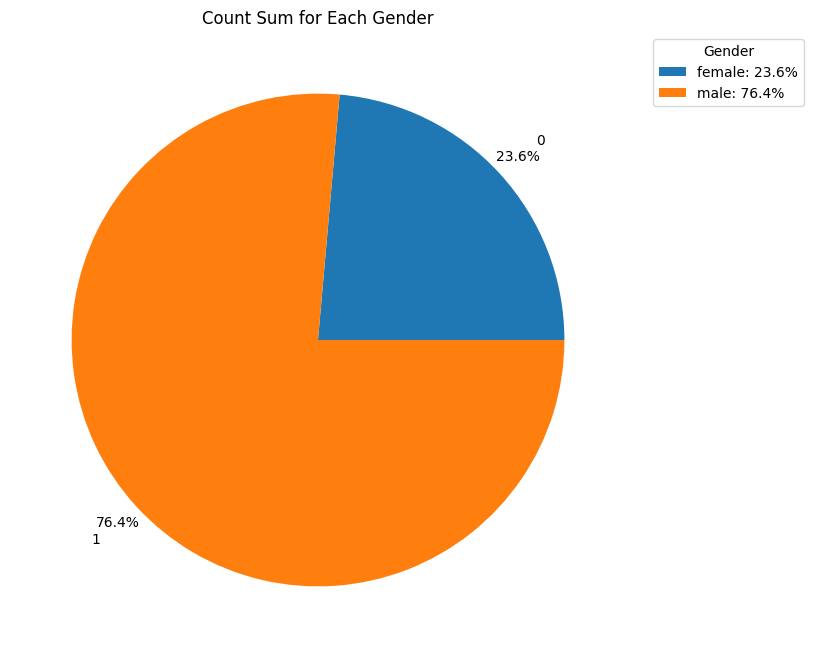

In [114]:
gender_counts = df_train['gender'].value_counts()

gender_counts = gender_counts.sort_index()

# Calculate the percentages
total = sum(gender_counts)
percentages = [(count/total)*100 for count in gender_counts]

# Find the min and max percentages
min_percent = min(percentages)
max_percent = max(percentages)

# Find number of the years that had min and max percentages
female = gender_counts.index[np.argmin(percentages)]
male = gender_counts.index[np.argmax(percentages)]

plt.figure(figsize=(8, 8))
pie = plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%.1f%%', pctdistance=1.1, labeldistance=1.2)

legend_labels = [f'female: {min_percent:.1f}%', f'male: {max_percent:.1f}%']
plt.legend(pie[0], legend_labels, title='Gender', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.title('Count Sum for Each Gender')
plt.show()

In [115]:
!pip install wordcloud

<Figure size 1000x600 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

Text(0.5, 1.0, 'Stories Distribution (Word Cloud)')

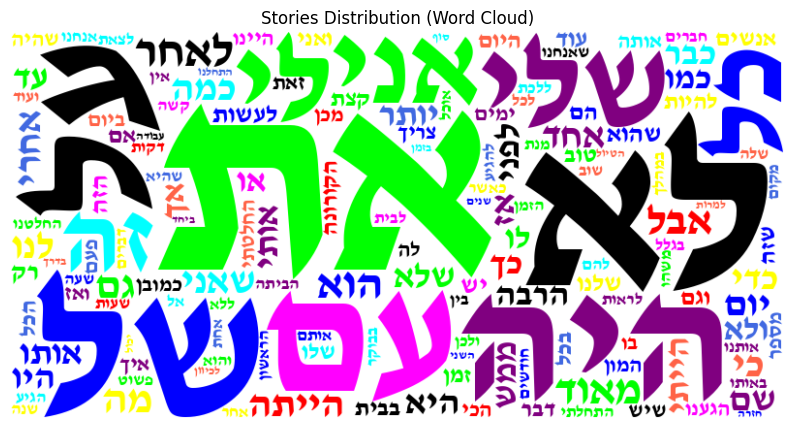

In [116]:
from wordcloud import WordCloud
import random

# Convert the 'story' column to a list of strings
summary_list = df_train['story'].astype(str).tolist()

# Initialize the CountVectorizer
vec = CountVectorizer()
freq_vec = vec.fit_transform(summary_list).toarray()

# Get the feature names (tokens)
feature_names = vec.get_feature_names_out()

# Remove words containing any digits using a regex
filtered_feature_names = [word for word in feature_names if not re.search(r'\d', word)]

# Create a dictionary of word frequencies
word_freq_dict = dict(zip(feature_names, freq_vec.sum(axis=0)))

# Sort the dictionary by frequency in descending order
sorted_word_freq = dict(sorted(word_freq_dict.items(), key=lambda item: item[1], reverse=True))

# Create a filtered dictionary of word frequencies
filtered_word_freq = {word: freq for word, freq in sorted_word_freq.items() if word in filtered_feature_names}

wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=150,font_path='davidbd.ttf').generate_from_frequencies(filtered_word_freq)

# Define custom colors for the words
colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#FFFF00', '#00FFFF', '#800080', '#000000', '#FF6347', '#4169E1']
wordcloud.recolor(color_func=lambda *args, **kwargs: random.choice(colors))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Stories Distribution (Word Cloud)')
plt.show()


# Machine learning models

### Imports

In [117]:
from sklearn.metrics import make_scorer
from sklearn.neural_network import MLPClassifier

In [118]:
# Define the F1 scorer
f1_scorer = make_scorer(f1_score, average='macro')

## Naive Bayse



In [119]:
gnb = GaussianNB()

# Perform cross-validation
f1_scores = cross_val_score(gnb, df_count, df_train['gender'], cv=10, scoring=f1_scorer)

# Calculate the average
average_f1 = np.mean(f1_scores)

print("Average F1 score:", average_f1)


Average F1 score: 0.4997852529492479


###    Try to improve the result by smoothing

In [120]:
# Define the parameter grid
param_grid = {'var_smoothing': np.logspace(0, -9, num=10)}
best_f1 = 0
best_var_smoothing = None
for var_smoothing in param_grid['var_smoothing']:
    gnb.set_params(var_smoothing=var_smoothing)
    scores = cross_val_score(gnb, df_count, df_train['gender'], cv=10, scoring=f1_scorer)
    avg_f1 = scores.mean()

    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_var_smoothing = var_smoothing

print("Best parameters:", best_var_smoothing)
print("Best F1 score:", best_f1)




GaussianNB(var_smoothing=1.0)

GaussianNB(var_smoothing=0.1)

GaussianNB(var_smoothing=0.01)

GaussianNB(var_smoothing=0.001)

GaussianNB(var_smoothing=0.0001)

GaussianNB(var_smoothing=1e-05)

GaussianNB(var_smoothing=1e-06)

GaussianNB(var_smoothing=1e-07)

GaussianNB(var_smoothing=1e-08)

GaussianNB()

Best parameters: 0.01
Best F1 score: 0.6134460126964397


###Run the Gaussian Naive Bayes with the best parameters we found



In [121]:
gnb = GaussianNB(var_smoothing=0.01)
# Perform cross-validation with F1 scoring
f1_scores = cross_val_score(gnb, df_count, df_train['gender'], cv=10, scoring=f1_scorer)
f1_scores

print()
average_f1 = np.mean(f1_scores)
print("Average F1 score:", average_f1)

array([0.56088993, 0.52574526, 0.63664862, 0.69574037, 0.64596273,
       0.61371645, 0.63664862, 0.58333333, 0.68220339, 0.55357143])


Average F1 score: 0.6134460126964397


#Neural Network

In [122]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
scores = cross_val_score(nn_classifier, df_count, df_train['gender'], cv=10, scoring=f1_scorer)

# Print the macro-averaged F1 scores for each fold
print(scores)
print()
# Calculate and print the mean macro-averaged F1 score
mean_macro_f1 = np.mean(scores)
print("Averaged F1 score:", mean_macro_f1)


[0.53846154 0.52059659 0.54801125 0.70238095 0.65277778 0.55357143
 0.58471761 0.57386364 0.65277778 0.53846154]

Averaged F1 score: 0.5865620098174953


# Desicion Tree

In [123]:
best_f1 = 0.0
best_params = {}
all_f1_scores = []

for minSamples in [5, 10, 15, 20,25]:
    for maxDepth in [2, 4, 6, 8,10]:
        decisionTree = DecisionTreeClassifier(max_depth=maxDepth, min_samples_split=minSamples)
        f1_scores = cross_val_score(decisionTree, df_count, df_train['gender'], cv=10, scoring='f1_macro')
        average_f1 = np.mean(f1_scores)

        # Update best F1 score and parameters if a better score is found
        if average_f1 > best_f1:
            best_f1 = average_f1
            best_params = {'min_samples_split': minSamples, 'max_depth': maxDepth}

print(f"Best F1 score: {best_f1}")
print("Best parameters:", best_params)

Best F1 score: 0.593574243435373
Best parameters: {'min_samples_split': 10, 'max_depth': 10}


###Run the Decision Tree with the best parameters we found


In [124]:
decisionTree = DecisionTreeClassifier(max_depth=10, min_samples_split=10)
f1_scores = cross_val_score(decisionTree, df_count, df_train['gender'], cv=10, scoring='f1_macro')
print(f1_scores)
average_f1 = np.mean(f1_scores)

print(f"Average F1 score: {average_f1}")


[0.56088993 0.6031746  0.52934662 0.56088993 0.56350565 0.58126551
 0.60480094 0.51697892 0.61371645 0.70862471]
Average F1 score: 0.5843193264897703


# KNN

### Find Hyper Parameters

In [125]:
distance_metrics = ['euclidean', 'manhattan']
best_f1 = 0

for distance_metric in distance_metrics:
  for k in range(3,20):
      clf = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
      f1_scorer = make_scorer(f1_score, average='macro')

      scores = cross_val_score(clf, df_count, df_train['gender'], scoring=f1_scorer, cv=10)
      mean_f1 = scores.mean()
      if mean_f1 > best_f1:
            best_f1 = mean_f1
            best_k = k
            best_distance = distance_metric

print(f"Best k: {best_k}")
print(f"Best distance metric: {best_distance}")
print(f"Best f1 score: {best_f1}")

Best k: 8
Best distance metric: euclidean
Best f1 score: 0.6081409536446432


###Run the KNeighbors with the best parameters we found


In [126]:
clf = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
f1_scorer = make_scorer(f1_score, average='macro')
scores = cross_val_score(clf,df_count,df_train['gender'],scoring=f1_scorer,cv=10)
print("f1 ",scores)
print()
average_f1_score = np.mean(scores)

print("Average F1 score:", average_f1_score)


f1  [0.48057814 0.625      0.65437788 0.64871194 0.60869565 0.56302966
 0.79674797 0.43541102 0.65277778 0.61607949]

Average F1 score: 0.6081409536446432


# SVM

### Find Hyper Parameters

In [127]:
svm_classifier = LinearSVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge']
}
best_score = 0
best_hyperparameters = {}

for c_v in param_grid['C']:
        for loss_v in param_grid['loss']:
            svm_classifier.set_params(C=c_v, penalty='l2', loss=loss_v,class_weight='balanced')

            # Calculate cross-validated F1 scores
            scores = cross_val_score(svm_classifier, df_count, df_train['gender'], cv=10, scoring=f1_scorer)

            avg_score = scores.mean()
            if avg_score > best_score:
                best_score = avg_score
                best_hyperparameters = {'C': c_v, 'loss': loss_v}

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", best_hyperparameters)
print("Best macro-averaged F1 score:", best_score)

LinearSVC(C=0.1, class_weight='balanced', loss='hinge')

LinearSVC(C=0.1, class_weight='balanced')

LinearSVC(C=1, class_weight='balanced', loss='hinge')

LinearSVC(C=1, class_weight='balanced')

LinearSVC(C=10, class_weight='balanced', loss='hinge')

LinearSVC(C=10, class_weight='balanced')

Best hyperparameters: {'C': 1, 'loss': 'hinge'}
Best macro-averaged F1 score: 0.6885816307279129


###Run the Linear SVC with the best parameters we found

In [128]:
svm_classifier = LinearSVC(C=1, loss='hinge', penalty='l2',class_weight='balanced')

cv_scores = cross_val_score(svm_classifier, df_count, df_train['gender'], cv=10, scoring=f1_scorer)

# Print the F1 scores
print(cv_scores)
print()

average_f1_score = np.mean(cv_scores)
print("Average F1 score:", average_f1_score)



[0.69262295 0.66666667 0.736      0.75       0.69262295 0.61607949
 0.64871194 0.70641373 0.67431762 0.70238095]

Average F1 score: 0.6885816307279129


# Pipline

In [129]:
text_clf_nb = Pipeline([
    ('vect', TfidfVectorizer(max_features= 10000,ngram_range=(1,2))),
    ('clf_svm', LinearSVC(C=1, loss='hinge', penalty='l2',class_weight='balanced'))
])


In [130]:
f1_scorer = make_scorer(f1_score, average='macro')
answer=cross_val_score(text_clf_nb,tokens_list,df_train['gender'], cv=10,scoring=f1_scorer)
text_clf_nb.fit(tokens_list, df_train['gender'])

print(answer)

print("Average F1 score:",answer.mean())

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('clf_svm',
                 LinearSVC(C=1, class_weight='balanced', loss='hinge'))])

[0.69262295 0.61371645 0.79674797 0.74747475 0.69262295 0.61607949
 0.75       0.67431762 0.67939584 0.70238095]
Average F1 score: 0.6965358974563111


#Run the pipeline with the dataframe of the PCA

In [136]:
svm_classifier = LinearSVC(C=1, loss='hinge', penalty='l2',class_weight='balanced')

cv_scores = cross_val_score(svm_classifier, pca_df, df_train['gender'], cv=10, scoring=f1_scorer)

# Print the F1 scores
print(cv_scores)
print()

average_f1_score = np.mean(cv_scores)
print("Average F1 score:", average_f1_score)



[0.69262295 0.66666667 0.736      0.75       0.69262295 0.61607949
 0.64871194 0.70641373 0.67431762 0.70238095]

Average F1 score: 0.6885816307279129


In [137]:
df_copy = df_test.copy()

In [138]:
tokens_list_test=Hebrew_tokenizer(df_copy)
df_copy['predicted_category'] = text_clf_nb.predict(tokens_list_test)
df_copy.predicted_category.replace({0:'f',1:'m'},inplace=True)

df_copy.head(100)

test_example_id                                              story  \
0                 0  כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...   
1                 1  הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת "...   
2                 2  אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...   
3                 3  רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי, אני...   
4                 4  אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...   
..              ...                                                ...   
95               95  לפני כשלוש שנים חבר הסביר לי על טכנולוגיית הבל...   
96               96  סיפור הבריחה שלי מצפון קוריאה מתחיל בעיר הולדת...   
97               97  נסעתי עם אשתי לפני כמה חודשים לקמפינג ליד אילת...   
98               98  קצת לפני תחילת הלימודים התחלתי לעבוד בחברה המס...   
99               99  יש לי בן זוג כבר שנתיים וממש לפני שהקורונה התח...   

   predicted_category  
0                   m  
1                   m  
2                   m  
3                   m  
4                   f  
..                ...  
95                  m  
96                  m  
97                  m  
98                  m  
99                  f  

[100 rows x 3 columns]

In [139]:
df_predicted = df_copy.copy()
df_predicted.drop(['story',], axis=1, inplace=True)
print("The 5 first rows")
df_predicted.head(5)
print("The 5 last rows")
df_predicted.tail(5)

The 5 first rows


test_example_id predicted_category
0                0                  m
1                1                  m
2                2                  m
3                3                  m
4                4                  f

The 5 last rows


test_example_id predicted_category
318              318                  m
319              319                  m
320              320                  m
321              321                  m
322              322                  m

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story.

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [134]:
df_predicted.to_csv('classification_results.csv',index=False)